In [1]:
import pandas as pd
import numpy as np  
from numpy.random import default_rng
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

# Read the data

In [2]:
df=pd.read_csv("C:/Users/91968/OneDrive/Desktop/Mini Project/Data Set/Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv")
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# Exploring the data

In [3]:
# shape of dataframe
df.shape

(3000, 14)

In [4]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [5]:
# Data type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
# Checking the null values
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### There is no null value in the dataset

# Categorical wise splitting the data in catagorical and continous

In [7]:
cat=[]
con=[]

for i in df.columns:
    if df[i].nunique()<50:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'catagorical':cat,'continous':con},headers=['categorical','continous']))    

categorical    continous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


In [8]:
# print the categorical columns
for col in df.columns:
    print(col,':',df[col].nunique())
    print('-------------')

Id : 3000
-------------
Area(total) : 71
-------------
Trooms : 5
-------------
Nbedrooms : 7
-------------
Nbwashrooms : 8
-------------
Twashrooms : 9
-------------
roof : 2
-------------
Roof(Area) : 52
-------------
Lawn(Area) : 51
-------------
Nfloors : 7
-------------
API : 61
-------------
ANB : 6
-------------
Expected price : 1647
-------------
Grade : 5
-------------


In [9]:
for i in df.columns:
    if df[i].nunique()<50:
        print(i,':',df[i].unique())
        print('---------------------------')

Trooms : [6 5 7 8 9]
---------------------------
Nbedrooms : [5 4 7 8 6 3 2]
---------------------------
Nbwashrooms : [4 3 6 7 5 2 8 1]
---------------------------
Twashrooms : [ 6  4  5  7  9  8  3  2 10]
---------------------------
roof : ['NO' 'YES']
---------------------------
Nfloors : [2 3 5 6 1 4 7]
---------------------------
ANB : [6 4 3 2 1 5]
---------------------------
Grade : ['D' 'C' 'B' 'A' 'E']
---------------------------


In [10]:
categorical_data=df.select_dtypes(exclude=[np.number])
categorical_data

,roof,Grade
0,NO,D
1,YES,D
2,YES,C
3,YES,D
4,NO,D
...,...,...
2995,YES,B
2996,YES,A
2997,NO,D
2998,NO,B


# EDA

In [11]:
new_df=df.drop(columns='Id')
new_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


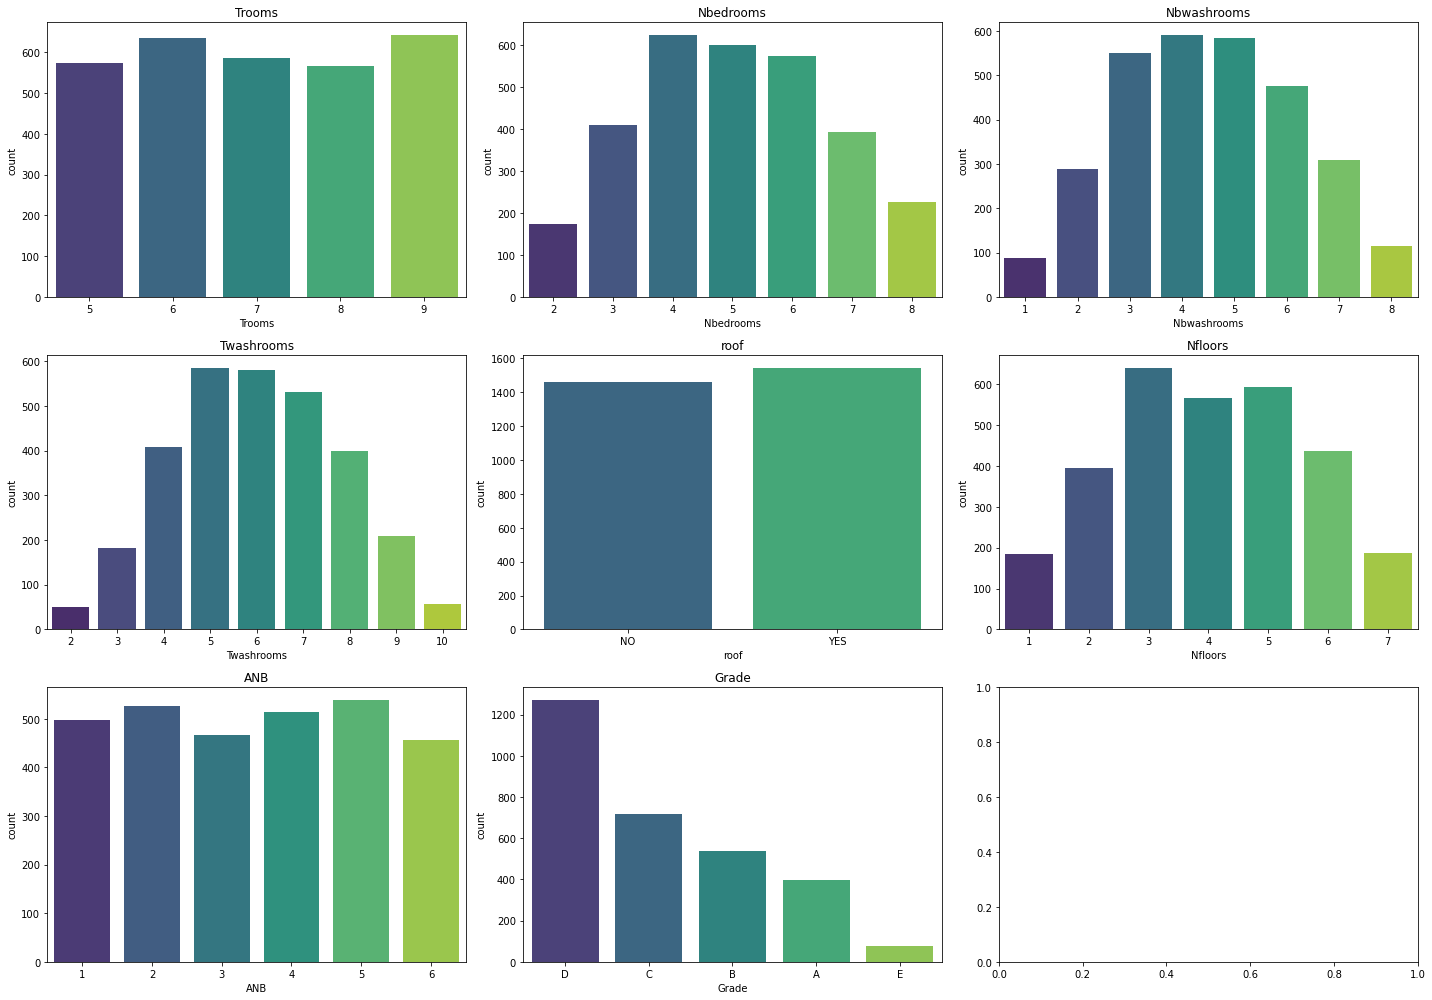

In [12]:
import seaborn as sns 
r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=new_df,x=new_df[i],palette='viridis',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show() 

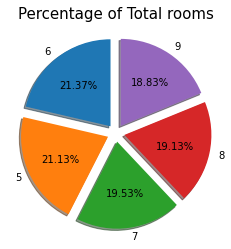

In [13]:
explode=[0.1,0.1,0.1,0.1,0.1]
plt.title('Percentage of Total rooms',fontsize=15)
plt.pie(df['Trooms'].value_counts(),labels=df['Trooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

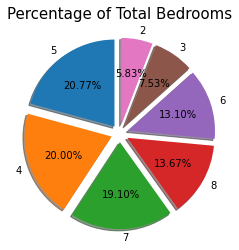

In [14]:
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.title('Percentage of Total Bedrooms',fontsize=15)
plt.pie(df['Nbedrooms'].value_counts(),labels=df['Nbedrooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

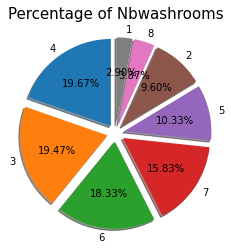

In [15]:
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.title('Percentage of Nbwashrooms',fontsize=15)
plt.pie(df['Nbwashrooms'].value_counts(),labels=df['Nbwashrooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

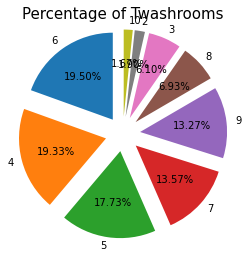

In [16]:
explode=[0.2]*len(df['Twashrooms'].unique())
plt.title('Percentage of Twashrooms',fontsize=15)
plt.pie(df['Twashrooms'].value_counts(),labels=df['Twashrooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);

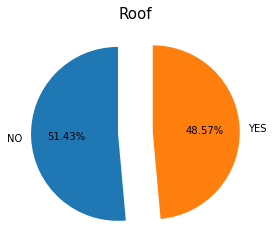

In [17]:
explode=[0.2]*len(df['roof'].unique())
plt.title('Roof',fontsize=15)
plt.pie(df['roof'].value_counts(),labels=df['roof'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);

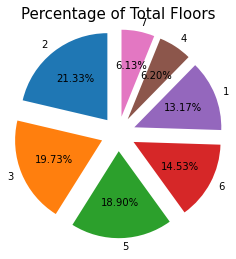

In [18]:
explode=[0.2]*len(df['Nfloors'].unique())
plt.title('Percentage of Total Floors',fontsize=15)
plt.pie(df['Nfloors'].value_counts(),labels=df['Nfloors'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);

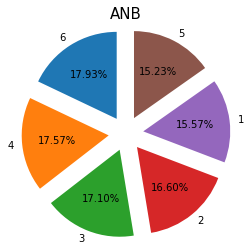

In [19]:
explode=[0.2]*len(df['ANB'].unique())
plt.title('ANB',fontsize=15)
plt.pie(df['ANB'].value_counts(),labels=df['ANB'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);

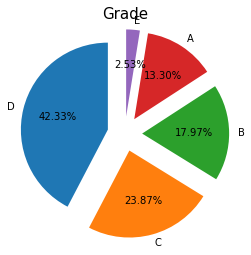

In [20]:
explode=[0.2]*len(df['Grade'].unique())
plt.title('Grade',fontsize=15)
plt.pie(df['Grade'].value_counts(),labels=df['Grade'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);

array([[<AxesSubplot:title={'center':'Area(total)'}>,
        <AxesSubplot:title={'center':'Roof(Area)'}>],
       [<AxesSubplot:title={'center':'Lawn(Area)'}>,
        <AxesSubplot:title={'center':'API'}>],
       [<AxesSubplot:title={'center':'Expected price'}>, <AxesSubplot:>]],
      dtype=object)

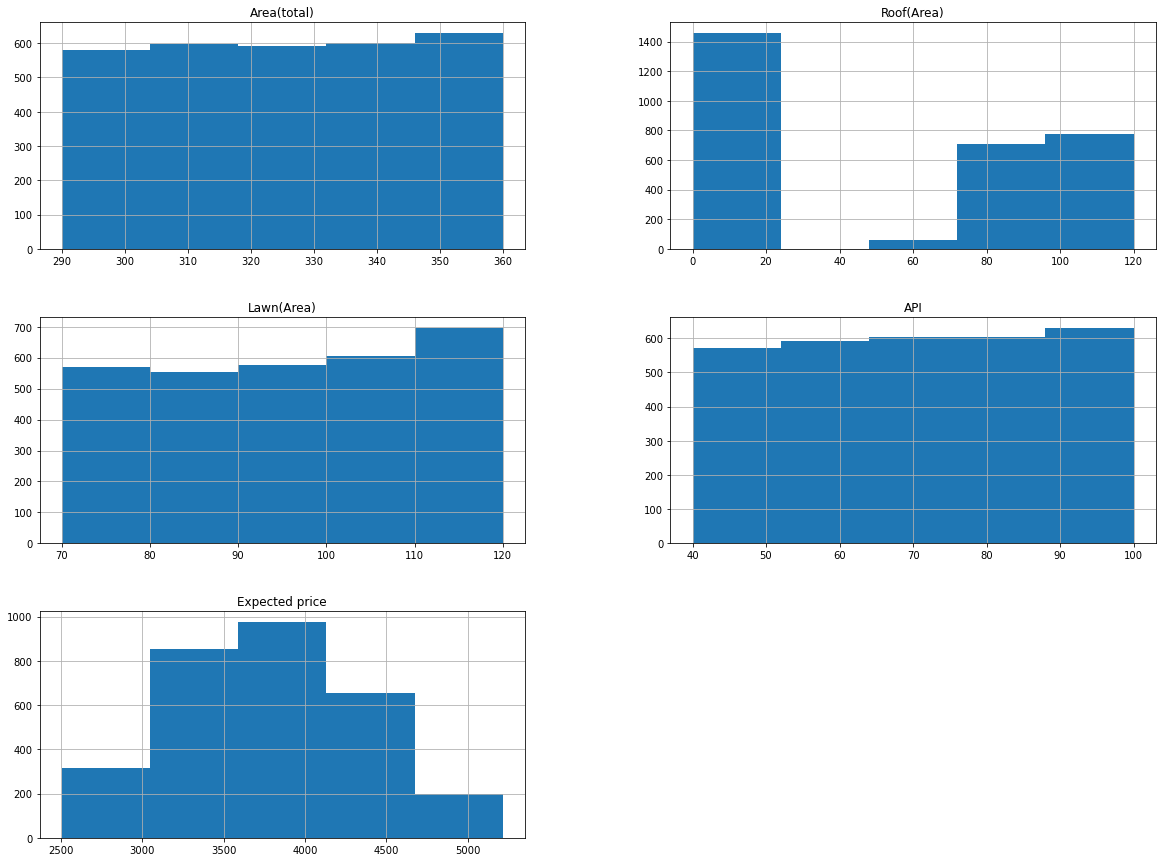

In [21]:
%matplotlib inline
new_df.hist(column=['Area(total)','Roof(Area)','Lawn(Area)','API','Expected price'],bins=5, figsize=(20,15))

In [22]:
con.remove('Id')

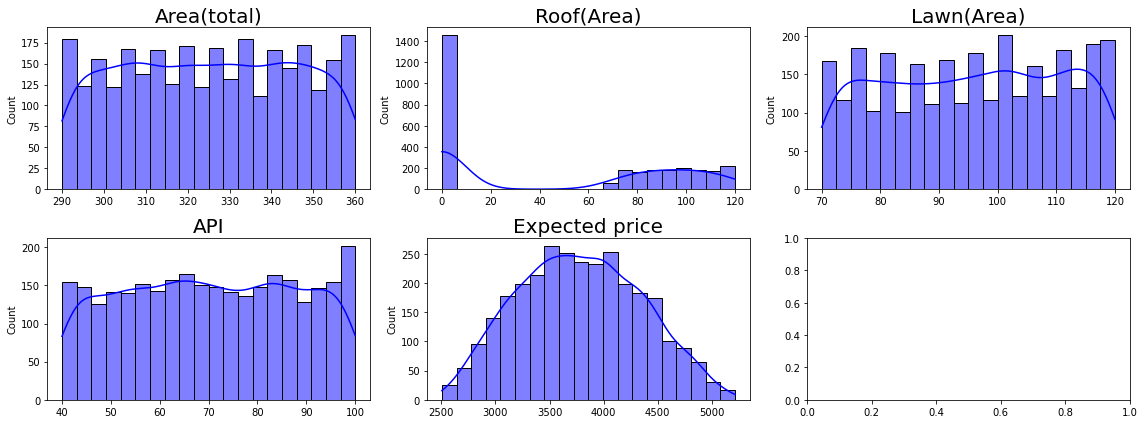

In [23]:
c=3
r=int(len(con)/r)+1

figs,axes =plt.subplots(r,c,figsize=(16,6),tight_layout=True)

for i , ax in zip(con,axes.flatten()[:len(con)]):
    sns.histplot(data=new_df,x=new_df[i].values,palette='magma',ax=ax,kde=True,bins=20,color='blue')
    
    ax.set_title(i,fontdict={'size':20})
plt.show() 

# Summerised the data

In [24]:
new_df.describe()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [25]:
# Structure of the data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area(total)     3000 non-null   int64 
 1   Trooms          3000 non-null   int64 
 2   Nbedrooms       3000 non-null   int64 
 3   Nbwashrooms     3000 non-null   int64 
 4   Twashrooms      3000 non-null   int64 
 5   roof            3000 non-null   object
 6   Roof(Area)      3000 non-null   int64 
 7   Lawn(Area)      3000 non-null   int64 
 8   Nfloors         3000 non-null   int64 
 9   API             3000 non-null   int64 
 10  ANB             3000 non-null   int64 
 11  Expected price  3000 non-null   int64 
 12  Grade           3000 non-null   object
dtypes: int64(11), object(2)
memory usage: 304.8+ KB


**we can see in the data there are two columns are in object type**
**we have to convert all the object type columns  into categorical type for Model building**

# Lable Encoding

In [26]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
new_df['roof']=label_encoder.fit_transform(new_df['roof'])
new_df['Grade']=label_encoder.fit_transform(new_df['Grade'])

13


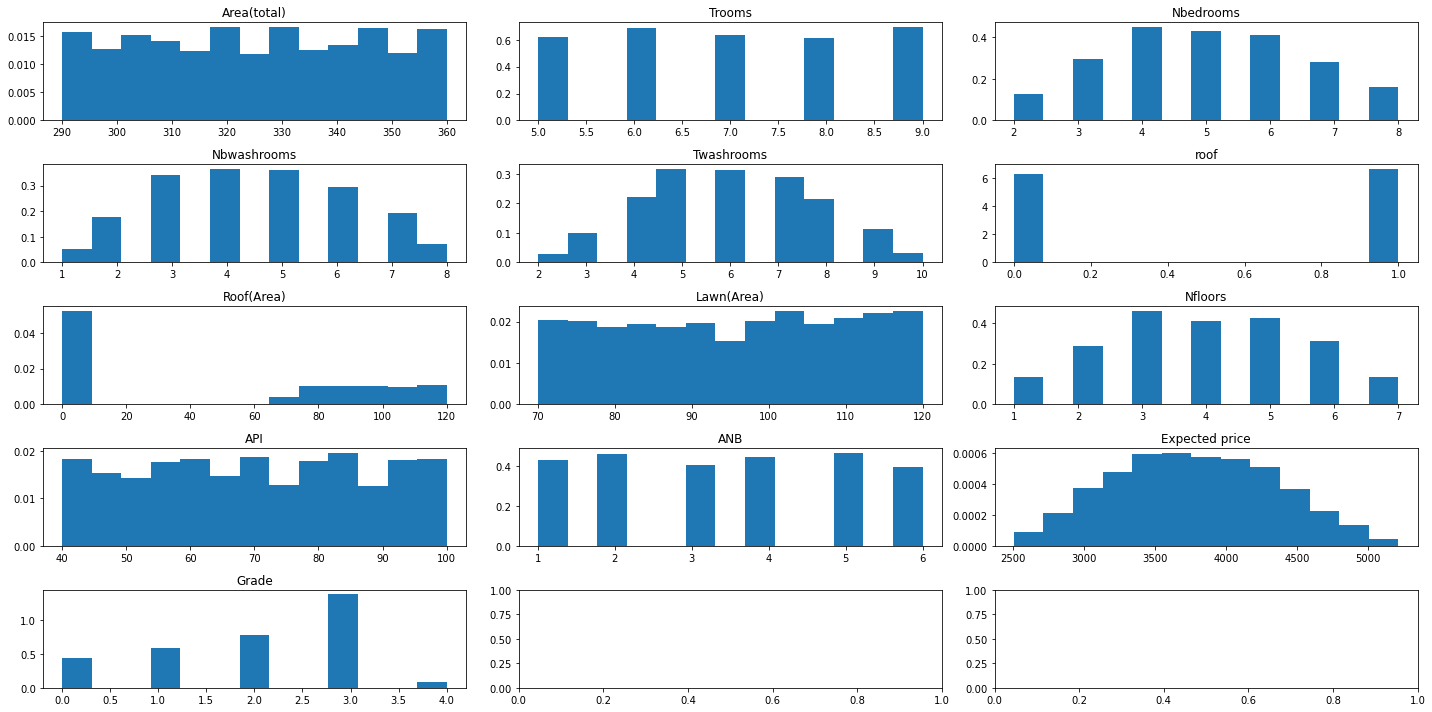

In [27]:
# Histogram for all numeric cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_new = new_df.select_dtypes(include=numerics)
numeric_cols=df_new.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n)) #research
  
bin_count = int(np.ceil(np.log2(len(df_new.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(df_new[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()

In [28]:
corr=new_df.corr()['Grade'].sort_values(ascending=True)
corr

Trooms           -0.875145
Nbedrooms        -0.865389
Nbwashrooms      -0.847319
Twashrooms       -0.819280
Nfloors          -0.787623
Expected price   -0.760820
Area(total)      -0.177332
Roof(Area)       -0.170259
roof             -0.166635
API              -0.099000
Lawn(Area)       -0.051200
ANB              -0.024025
Grade             1.000000
Name: Grade, dtype: float64

<AxesSubplot:>

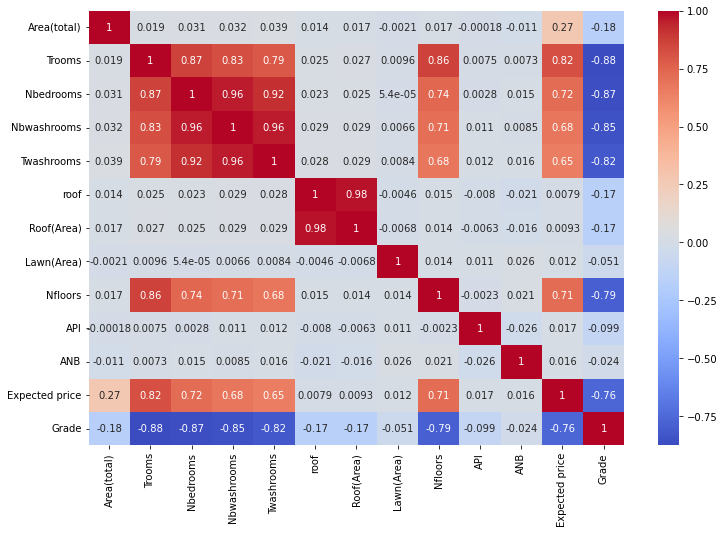

In [29]:
plt.figure(figsize=(12,8))
corr = new_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Data Scaling

In [30]:
new_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [31]:
scale=StandardScaler()

In [34]:
X1=X.copy()
X2=scale.fit_transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)
X.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911


# splitting the data in Train and test

In [35]:
X=new_df.drop(columns='Grade')
y=new_df['Grade']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)
print(x_train.shape)
print(x_test.shape)

(2100, 12)
(900, 12)


In [37]:
print(X.shape,y.shape)

(3000, 12) (3000,)


In [38]:
print(x_train.shape,y_train.shape)

(2100, 12) (2100,)


In [39]:
print(x_test.shape,y_test.shape)

(900, 12) (900,)


# Model Evaluation

In [43]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [40]:
names=[]
result=[]
roc=[]

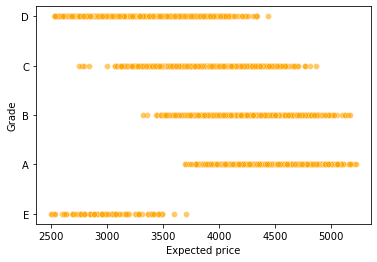

In [44]:
sns.scatterplot(data=df,y='Grade',x='Expected price',alpha=0.6,color='orange');

### We can Comprehend that the Target Variable is in 5 Class so we would apply Classification Models .

# Model Building

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Model 1 : Logistic Regression 

In [46]:
model_logictic=LogisticRegression()
names.append(model_logictic)

## Training model , Prediction , and printing unique Classification : 

In [47]:
model_logictic.fit(x_train,y_train)

y_log=model_logictic.predict(x_test)

np.unique(y_log)

array([0, 1, 2, 3])

In [48]:
# Intercept and Coefficients
print('The Intercept is :',model_logictic.intercept_)

The Intercept is : [-2.78850710e-04 -1.40362989e-04 -9.06378582e-05  3.78533333e-04
  1.31318224e-04]


In [49]:
model_logictic.coef_

array([[-5.21294925e-02,  2.36669893e-03,  5.37689749e-03,
         5.97113234e-03,  5.66427131e-03,  1.25031353e-04,
         1.31236621e-02, -1.54852416e-02,  3.78307466e-03,
        -5.83477386e-03, -9.10531831e-04,  4.46327280e-03],
       [-2.32953470e-02,  2.63538163e-03,  2.38868214e-03,
         2.43124564e-03,  2.37050701e-03,  6.48261375e-05,
         6.28612047e-03, -7.47851110e-03,  3.15637353e-03,
         2.87582061e-03, -1.35285394e-03,  2.15085250e-03],
       [ 6.69368929e-03, -1.72326824e-04,  5.25584757e-05,
         1.87497053e-04,  8.47500385e-05,  2.63676464e-05,
         2.50497252e-03,  1.56924324e-03, -2.43891206e-05,
         5.11362543e-03,  1.16481582e-03, -3.88211093e-04],
       [ 4.04670604e-02, -4.33231919e-03, -6.65694732e-03,
        -7.25398729e-03, -6.89669306e-03, -3.87994881e-05,
        -3.62007248e-03,  1.32906099e-02, -6.07120586e-03,
         1.89896527e-03,  7.24868536e-04, -3.41439510e-03],
       [ 2.82640897e-02, -4.97434553e-04, -1.1611907

### The Score (efficiency of the model) :

In [50]:
print('The Score of Model on Training Dataset : ',model_logictic.score(x_train,y_train))

The Score of Model on Training Dataset :  0.5395238095238095


In [51]:
result.append(model_logictic.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_logictic.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.5666666666666667


In [52]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_log),4)*100,'%')

The Accuracy Score of the Model :  56.67 %


### Count Each Class Predictions :

In [53]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_log)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 128 
Class 1 : 111 
Class 2 : 190 
Class 3 : 471 
Class 4 : 0 


### Confusion Matrix and Plot 

[[ 56  34  28   0   0]
 [ 52  42  40  17   0]
 [ 19  33  65  76   0]
 [  1   2  55 347   0]
 [  0   0   2  31   0]]

 Plot of Confusion Matrix : 



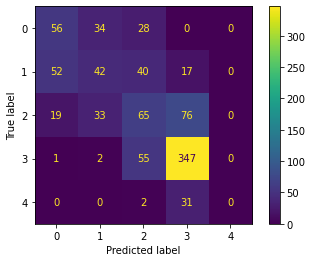

In [54]:
print(confusion_matrix(y_test,y_log))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_logictic,x_test,y_test)
plt.show()

### Classification Report

In [55]:
print(classification_report(y_test,y_log))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46       118
           1       0.38      0.28      0.32       151
           2       0.34      0.34      0.34       193
           3       0.74      0.86      0.79       405
           4       0.00      0.00      0.00        33

    accuracy                           0.57       900
   macro avg       0.38      0.39      0.38       900
weighted avg       0.53      0.57      0.54       900



### ROC_AUC Score 

 ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes and its best used for the binary classifications .

### The Coefficient for different Class for different Features .

In [56]:
pd.DataFrame(model_logictic.coef_,columns=X.columns)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,-0.052129,0.002367,0.005377,0.005971,0.005664,0.000125,0.013124,-0.015485,0.003783,-0.005835,-0.000911,0.004463
1,-0.023295,0.002635,0.002389,0.002431,0.002371,0.000065,0.006286,-0.007479,0.003156,0.002876,-0.001353,0.002151
2,0.006694,-0.000172,0.000053,0.000187,0.000085,0.000026,0.002505,0.001569,-0.000024,0.005114,0.001165,-0.000388
3,0.040467,-0.004332,-0.006657,-0.007254,-0.006897,-0.000039,-0.003620,0.013291,-0.006071,0.001899,0.000725,-0.003414
4,0.028264,-0.000497,-0.001161,-0.001336,-0.001223,-0.000177,-0.018295,0.008104,-0.000844,-0.004054,0.000374,-0.002812


### For predicting the Grade A houses :

### These features highly impact the classification :

In [58]:
pd.DataFrame(model_logictic.coef_[0].reshape(-1,1),columns=['Coefficient'],index=X.columns).sort_values(by='Coefficient',ascending=False)

,Coefficient
Roof(Area),0.013124
Nbwashrooms,0.005971
Twashrooms,0.005664
Nbedrooms,0.005377
Expected price,0.004463
Nfloors,0.003783
Trooms,0.002367
roof,0.000125
ANB,-0.000911
API,-0.005835


### Histogram Plot of Prediction of Logistic Regression :

<AxesSubplot:ylabel='Count'>

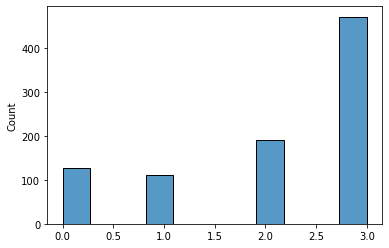

In [59]:
sns.histplot(y_log)

 # Model-2:- Random Forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [61]:
model_random=RandomForestClassifier()

In [62]:
names.append(model_random)

#### Training model , Prediction , and printing unique Classification : 

In [63]:
model_random.fit(x_train,y_train)

y_rand=model_random.predict(x_test)

np.unique(y_rand)

array([0, 1, 2, 3, 4])

### The Score (efficiency of the model) :

In [64]:
print('The Score of Model on Training Dataset : ',model_random.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [65]:
result.append(model_random.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_random.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.9022222222222223


In [66]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_rand),4)*100,'%')

The Accuracy Score of the Model :  90.22 %


### Count Each Class Predictions :

In [67]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_rand)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 118 
Class 1 : 149 
Class 2 : 194 
Class 3 : 427 
Class 4 : 12 


## Feature Importances :

In [68]:
model_random.feature_importances_

array([0.09352082, 0.19585718, 0.12446139, 0.11885913, 0.07855045,
       0.02310264, 0.04984152, 0.04291482, 0.07192622, 0.06297788,
       0.023277  , 0.11471094])

In [69]:
model_random.base_estimator_

DecisionTreeClassifier()

In [70]:
pd.DataFrame(model_random.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

,Feature Importances
Trooms,0.195857
Nbedrooms,0.124461
Nbwashrooms,0.118859
Expected price,0.114711
Area(total),0.093521
Twashrooms,0.078550
Nfloors,0.071926
API,0.062978
Roof(Area),0.049842
Lawn(Area),0.042915


### Confusion Matrix and Plot 

[[110   8   0   0   0]
 [  8 133  10   0   0]
 [  0   8 169  16   0]
 [  0   0  15 389   1]
 [  0   0   0  22  11]]

 Plot of Confusion Matrix : 



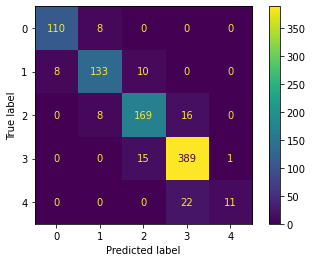

In [71]:
print(confusion_matrix(y_test,y_rand))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_random,x_test,y_test)
plt.show()

### Plotting Decsion Tree :

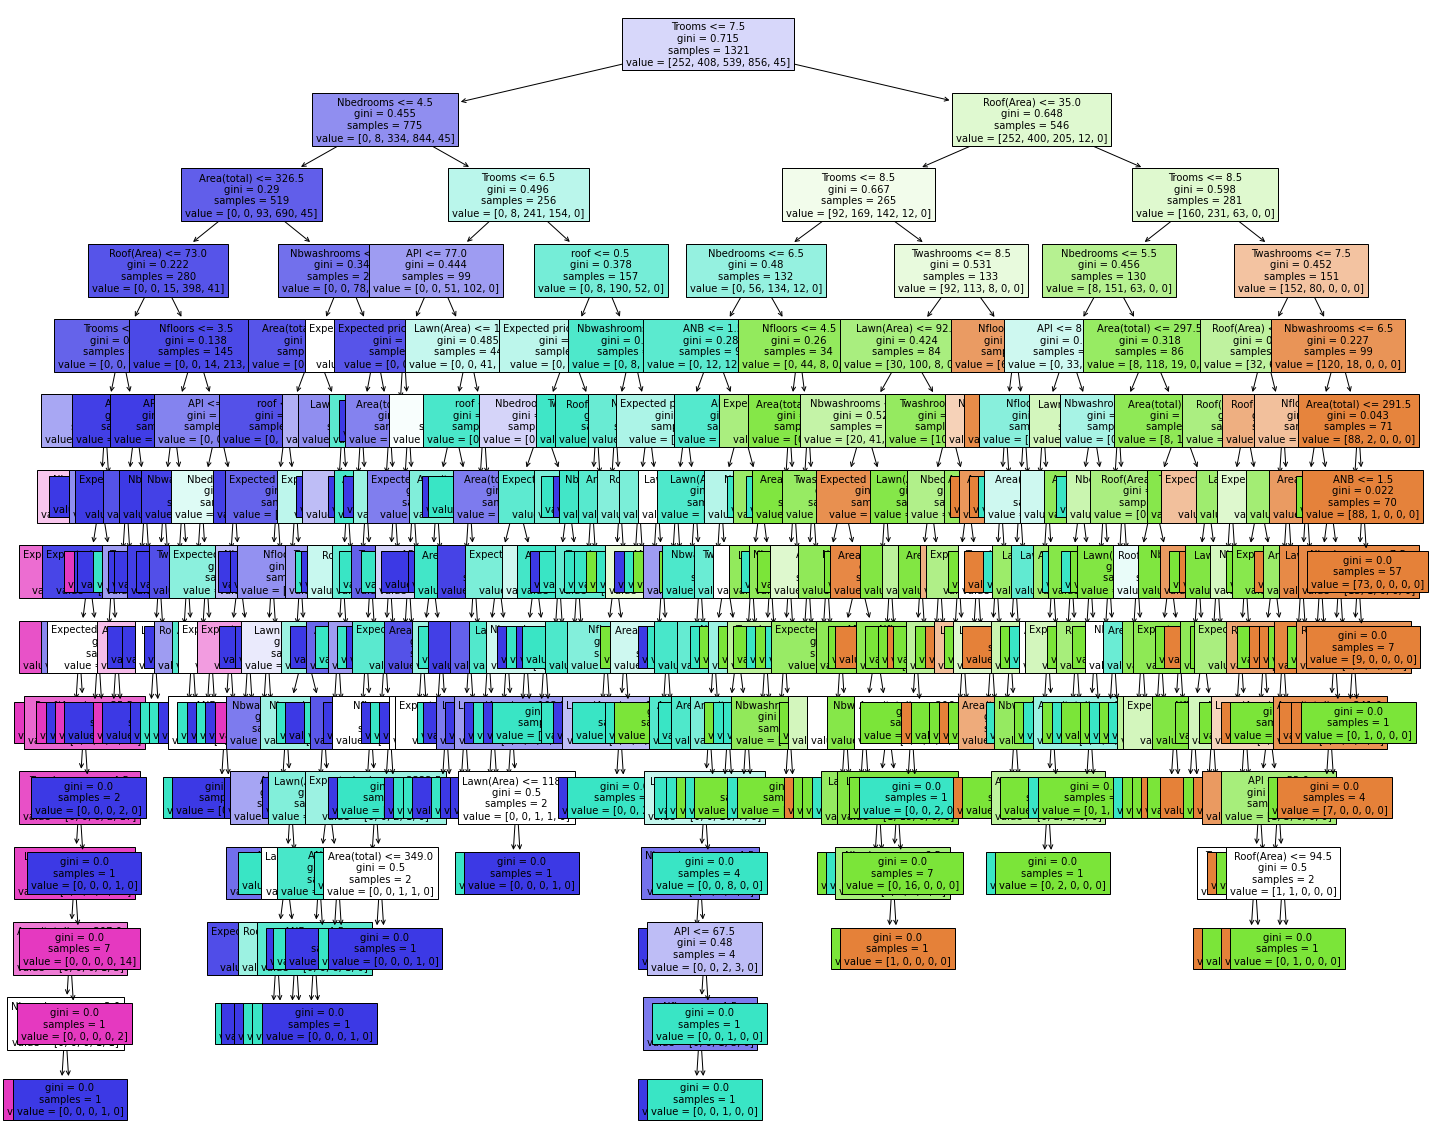

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,16))
plot_tree(model_random[0],fontsize=10,feature_names=X.columns,filled=True)
plt.tight_layout()
plt.show()

# Model 3 :- AdaBoostClassifier

In [74]:
model_ada=AdaBoostClassifier()

In [75]:
names.append(model_ada)

### Training model , Prediction , and printing unique Classification :

In [76]:
model_ada.fit(x_train,y_train)

y_ada=model_ada.predict(x_test)

print('Unique Classes')
print(np.unique(y_ada),'\n')

x=np.unique(y_ada)

count=Counter(y_ada)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[1 2 3 4] 

Class 1 : 301 
Class 2 : 87 
Class 3 : 378 
Class 4 : 134 


### The Score (efficiency of the model) :

In [77]:
print('The Score of Model on Training Dataset : ',model_ada.score(x_train,y_train))
result.append(model_ada.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_ada.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_ada),4)*100,'%')

The Score of Model on Training Dataset :  0.5938095238095238
The Score of Model on Testing Dataset :  0.5744444444444444
The Accuracy Score of the Model :  57.440000000000005 %


** The Score of Model is really less and the classes predicted are also not according to desired result so we wont consider this model .**

# Hyperparameter Tuning for best model 

In [79]:
# Lets Try Hyper Parameter Tuning for Logistic Regression 
c=np.logspace(0,4,10)

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
grid=GridSearchCV(model_logictic,param_grid={'penalty':['l1','l2'],'C':c},n_jobs=-1)

In [82]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [83]:
grid.best_score_

0.5404761904761904

In [84]:
best=grid.best_estimator_
best

LogisticRegression(C=166.81005372000593)

In [85]:
best.score(x_test,y_test)

0.5566666666666666

In [86]:
# Predict and Unique Value 
y_best=best.predict(x_test)

In [87]:
np.unique(y_best)

array([0, 1, 2, 3])

### The Score (efficiency of the model) :

In [88]:
print('The Score of Model on Training Dataset : ',best.score(x_train,y_train))
print('The Score of Model on Testing Dataset : ',best.score(x_test,y_test))
print('The Accuracy Score of the Model  : ',round(accuracy_score(y_test,y_best),4)*100,'%')

The Score of Model on Training Dataset :  0.5352380952380953
The Score of Model on Testing Dataset :  0.5566666666666666
The Accuracy Score of the Model  :  55.669999999999995 %


In [89]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_best)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 132 
Class 1 : 112 
Class 2 : 176 
Class 3 : 480 
Class 4 : 0 


[[ 57  31  29   1   0]
 [ 54  36  43  18   0]
 [ 19  39  57  78   0]
 [  2   6  46 351   0]
 [  0   0   1  32   0]]

 Plot of Confusion Matrix : 



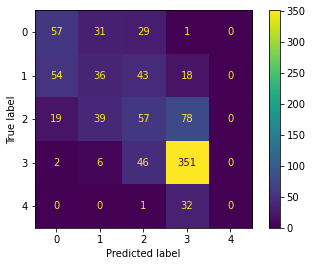

In [90]:
# Confusion Matrix and Plot 
print(confusion_matrix(y_test,y_best))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(best,x_test,y_test)
plt.show()

In [91]:
# Classification Report
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.43      0.48      0.46       118
           1       0.32      0.24      0.27       151
           2       0.32      0.30      0.31       193
           3       0.73      0.87      0.79       405
           4       0.00      0.00      0.00        33

    accuracy                           0.56       900
   macro avg       0.36      0.38      0.37       900
weighted avg       0.51      0.56      0.53       900



In [92]:
# Intercept and Coefficients
print('The Intercept is :',best.intercept_)

The Intercept is : [-2.46764931e-04 -1.20526039e-04 -6.72500970e-05  3.23105211e-04
  1.11435857e-04]


### The Coefficient for different Class for different Features .

In [93]:
pd.DataFrame(best.coef_,columns=X.columns)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,-0.048694,0.001983,0.004512,0.005013,0.004735,0.000124,0.013046,-0.014532,0.003206,-0.005940,-0.000801,0.004165
1,-0.020727,0.002201,0.002002,0.002039,0.001981,0.000018,0.001659,-0.006590,0.002645,0.002472,-0.001139,0.001971
2,0.008070,-0.000153,0.000019,0.000128,0.000056,0.000037,0.003516,0.002049,-0.000055,0.005231,0.000988,-0.000549
3,0.036994,-0.003613,-0.005560,-0.006060,-0.005750,-0.000023,-0.002116,0.012085,-0.005083,0.001444,0.000631,-0.003104
4,0.024357,-0.000419,-0.000973,-0.001119,-0.001022,-0.000157,-0.016105,0.006988,-0.000713,-0.003207,0.000321,-0.002484


# Best model to predict is :

In [94]:
best 

LogisticRegression(C=166.81005372000593)

# Interact Function for presentations :

In [95]:
def models(model):

    model_interact=model
    
    model_interact.fit(x_train,y_train)

    y_inter=model_interact.predict(x_test)

    print('\n The Unique Predicted Classes : \n',np.unique(y_inter))
     
    x=np.unique(y_inter)

    count=Counter(y_inter)
    print(' ***********Count of Classes *********\n')
    for i in x:
        
        print('Class {0} : {1} '.format(i,count[i])) 
    
    print('\n************** Accuracy (Score of Model) ***************\n')

    print('The Score of Model on Training Dataset : ',model_interact.score(x_train,y_train))
    print('The Score of Model on Testing Dataset : ',model_interact.score(x_test,y_test),'\n')
    print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_inter),4)*100,'%')
    
    print('\n******** Confusion Matrix ********\n')

    print(confusion_matrix(y_test,y_inter))

    print('\n Plot of Confusion Matrix : \n')
    plot_confusion_matrix(model_interact,x_test,y_test)
    plt.show()


    print('\n ********** Classification Report **********\n')

    print(classification_report(y_test,y_inter))

    if model.__class__.__name__== 'LogisticRegression':
        print('\nThe Intercept is :',model_interact.intercept_)
        print('\n The Coefficient for different class for different Features \n')
        print(pd.DataFrame(model_interact.coef_,columns=X.columns))
        

        print('\n Histogram for Prediction of Logistic Regression : \n')
        sns.histplot(y_inter)
        plt.show()

    elif  model.__class__.__name__== 'DecisionTreeClassifier'  :
        print('The DataFrame for Feature Importances\n')
        print('\n',pd.DataFrame(model_interact.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False))
        plt.figure(figsize=(20,16))
        plot_tree(model_interact,fontsize=10,feature_names=X.columns,filled=True)
        plt.tight_layout()
        plt.show()

    elif  model.__class__.__name__== 'RandomForestClassifier'  :
        print('The DataFrame for Feature Importances\n')
        print('\n',pd.DataFrame(model_interact.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False))
        plt.figure(figsize=(20,16))
        plot_tree(model_interact[0],fontsize=10,feature_names=X.columns,filled=True)
        plt.tight_layout()
        plt.show()

    elif  model.__class__.__name__== 'GaussianNB' :
        importance=permutation_importance(model_interact,x_test,y_test)
        importance
        print('\nThe DataFrame of Feature Importance\n')
        print(pd.DataFrame(importance.importances_mean,index=X.columns,columns=['Importances']).sort_values(by='Importances',ascending=False))



        

In [97]:
from ipywidgets import interact
interact(models,model=[LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier()])

interactive(children=(Dropdown(description='model', options=(LogisticRegression(), RandomForestClassifier(), A…

<function __main__.models(model)>